# EDA - Fake News

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

In [13]:
#! pip install spacy
!python -m spacy download en_core_web_md

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
      --------------------------------------- 0.8/33.5 MB 4.2 MB/s eta 0:00:08
     - -------------------------------------- 1.0/33.5 MB 2.9 MB/s eta 0:00:12
     -- ------------------------------------- 1.8/33.5 MB 2.9 MB/s eta 0:00:12
     --- ------------------------------------ 2.6/33.5 MB 3.0 MB/s eta 0:00:11
     --- ------------------------------------ 2.9/33.5 MB 2.8 MB/s eta 0:00:11
     ---- ----------------------------------- 3.7/33.5 MB 2.8 MB/s eta 0:00:11
     ---- ----------------------------------- 3.9/33.5 MB 2.8 MB/s eta 0:00:11
     ----- ---------------------------------- 4.5/33.5 MB 2.7 MB/s eta 0:00:11
     ----- ---------------------------------- 4.7/33.5 MB 2.4 MB/s eta 0:00:12
     ------ --------------------------------- 5.2/33.5 MB 2.4 MB/s eta 0:00:12
     ------ --------------------------------- 5.5/33.5 MB 2.

In [14]:
df_fake = pd.read_csv(os.path.join('..','data', 'Fake.csv'))
df_fake['label'] = 'Fake'
df_fake.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [15]:
df_true = pd.read_csv(os.path.join('..','data', 'True.csv'))
df_true['label'] = 'Real'
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real


In [16]:
df_news = pd.concat([df_true, df_fake])

In [17]:
df_news.label.value_counts(normalize=True)

label
Fake    0.522985
Real    0.477015
Name: proportion, dtype: float64

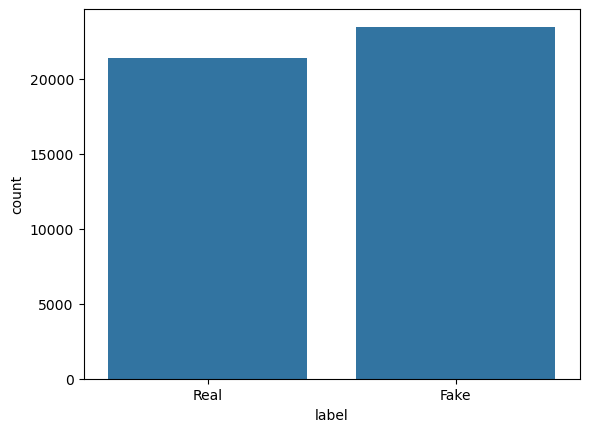

In [18]:
sns.countplot(data=df_news, x='label')
plt.show()

# Vectorization

## Extracting Features through Tf-idf vectorizer

In [19]:

tokenizer = spacy.load('en_core_web_md')
def preprocess(text):
    docs = tokenizer.pipe(
        text,
        disable=['parser', 'ner'],
        n_process=4,
        batch_size=64,
    )
    for doc in docs:
        yield " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorization(x_train, x_test):
    vect = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
    x_train_vect = vect.fit_transform(x_train)
    x_test_vect = vect.transform(x_test)
    return x_train_vect, x_test_vect, vect

## Encoding the Target

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_news['label'] = le.fit_transform(df_news['label'])

## Spliting data into x & y

In [25]:
df_news['text'] = list(preprocess(df_news['text']))

x = df_news['text']
y = df_news['label']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
import torch

if torch.cuda.is_available():
    # Create a tensor on the GPU
    x = torch.rand(1000, 1000).cuda()
    y = torch.rand(1000, 1000).cuda()
    # Perform a matrix multiplication on the GPU
    result = x @ y
    print("PyTorch GPU operation successful.")
else:
    print("CUDA not available for PyTorch.")

ModuleNotFoundError: No module named 'torch'